 E-commerce Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [4]:
df = pd.read_csv("E-commerce Dataset.csv")
print("shape:", df.shape)
display(df.columns.tolist())

shape: (51290, 16)


['Order_Date',
 'Time',
 'Aging',
 'Customer_Id',
 'Gender',
 'Device_Type',
 'Customer_Login_type',
 'Product_Category',
 'Product',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping_Cost',
 'Order_Priority',
 'Payment_method']

Check data type


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

Missing values

In [7]:
display(df.isnull().sum().sort_values(ascending=False).head(20))

Quantity               2
Order_Priority         2
Aging                  1
Sales                  1
Discount               1
Shipping_Cost          1
Order_Date             0
Time                   0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Profit                 0
Payment_method         0
dtype: int64

duplicate rows

In [8]:
print("duplicate rows:", df.duplicated().sum())

duplicate rows: 0


In [6]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


data cleaning

for missing values- imputation


In [10]:
num_cols = ['Aging', 'Sales', 'Quantity', 'Discount', 'Shipping_Cost']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = ['Order_Priority']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

Convert date and time columns

In [11]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

Feature Engineering

In [13]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day
df['DayOfWeek'] = df['Order_Date'].dt.day_name()

def get_time_of_day(t):
    if t is None or pd.isna(t):
        return np.nan
    hour = t.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Time'].apply(get_time_of_day)

df[['Order_Date', 'Time', 'DayOfWeek', 'TimeOfDay', 'Month', 'Year']].head()

,Order_Date,Time,DayOfWeek,TimeOfDay,Month,Year
0,2018-01-02,10:56:33,Tuesday,Morning,1,2018
1,2018-07-24,20:41:37,Tuesday,Evening,7,2018
2,2018-11-08,08:38:49,Thursday,Morning,11,2018
3,2018-04-18,19:28:06,Wednesday,Evening,4,2018
4,2018-08-13,21:18:39,Monday,Night,8,2018


Outlier Detection

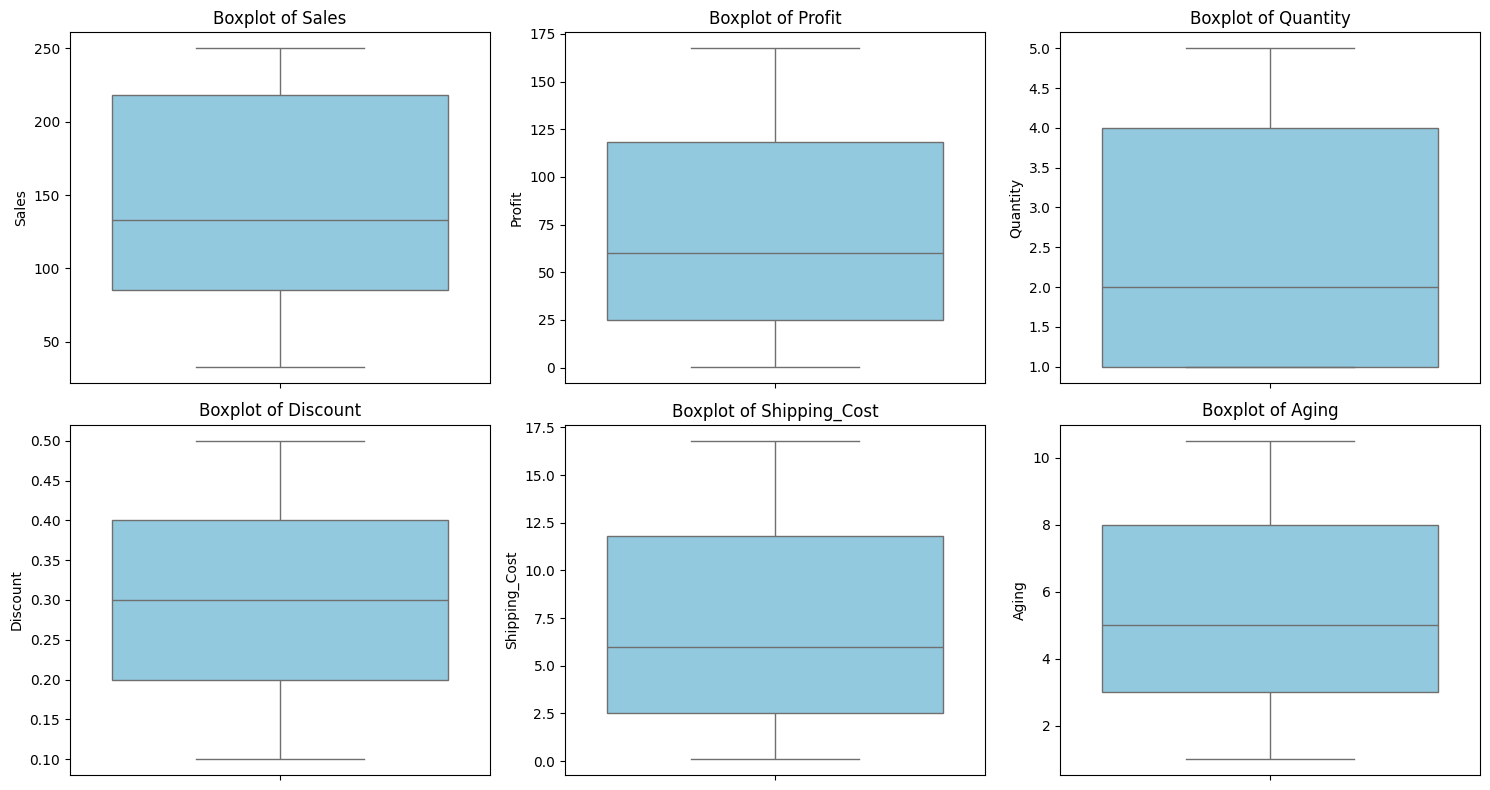

In [17]:
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping_Cost', 'Aging']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [18]:
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

for col in num_cols:
    outliers, lower, upper = find_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers found | Range = ({lower:.2f}, {upper:.2f})")


Sales: 0 outliers found | Range = (-114.50, 417.50)
Profit: 0 outliers found | Range = (-115.35, 258.65)
Quantity: 0 outliers found | Range = (-3.50, 8.50)
Discount: 0 outliers found | Range = (-0.10, 0.70)
Shipping_Cost: 0 outliers found | Range = (-11.45, 25.75)
Aging: 0 outliers found | Range = (-4.50, 15.50)
